### Libraries and data

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load data

In [3]:
df = pd.read_csv("diamond.csv")
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


# Data preparation

### Isolate X and Y

In [5]:
y = df.price
x = df.carat

### Adding constant

In [7]:
x = sm.add_constant(x)
x.head(2)

,const,carat
0,1.0,0.3
1,1.0,0.3


# Linear Regression

### Regression Model

In [10]:
model1 = sm.OLS(endog = y, exog = x).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          3.04e-150
Time:                        15:06:19   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

### Plotting

Text(0, 0.5, 'Price')

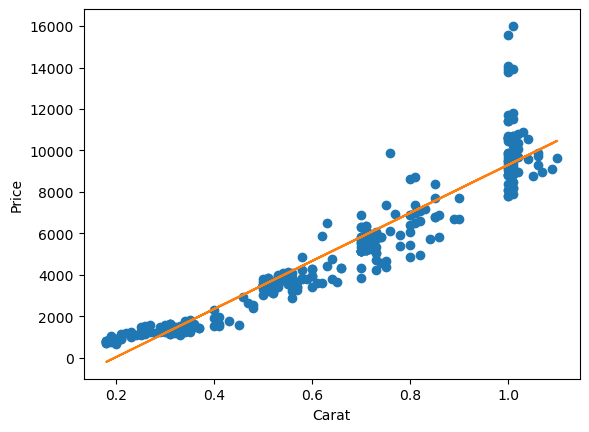

In [11]:
x = df.carat
plt.plot(x, y, 'o')
b, a = np.polyfit(x, y, 1)
plt.plot(x, b * x + a)
plt.xlabel('Carat')
plt.ylabel('Price')

# Linear Regression with dummy variable

### look at carat variable

In [12]:
df.carat.describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

### create binary variable

In [14]:
df['carat_binary'] = np.where(df.carat > 0.6, 1, 0)
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary
0,1,0.30,D,VS2,GIA,1302,0
1,2,0.30,E,VS1,GIA,1510,0
2,3,0.30,G,VVS1,GIA,1510,0
3,4,0.30,G,VS1,GIA,1260,0
4,5,0.31,D,VS1,GIA,1641,0


### isolate x and y

In [15]:
y = df.price
x = df.carat_binary

### add constant

In [16]:
x = sm.add_constant(x)

### Linear Regression

In [17]:
model2 = sm.OLS(endog = y, exog = x).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.79e-73
Time:                        15:17:11   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2225.2303    161.442     13.783   

### Plot

Text(0, 0.5, 'Price')

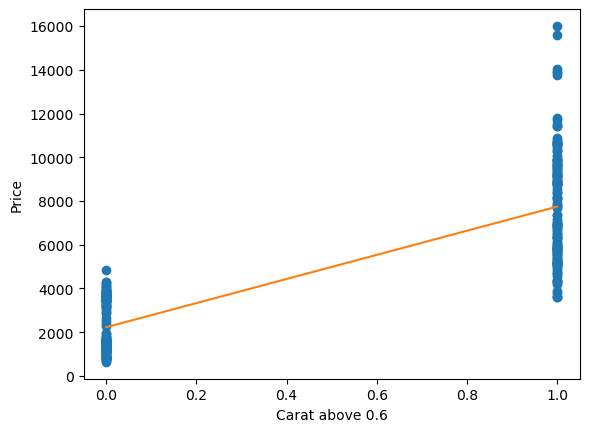

In [18]:
x = df.carat_binary
plt.plot(x, y, 'o')
b, a = np.polyfit(x, y, 1)
plt.plot(x, b * x +a)
plt.xlabel('Carat above 0.6')
plt.ylabel('Price')